<a href="https://colab.research.google.com/github/hojinlee/Finance_Analysis/blob/main/fi_raw_material_fx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pykrx
!pip install quandl

import quandl
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
%matplotlib inline

quandl.ApiConfig.api_key = "xGczFwfuzf6XrWHdkn8N"


     |████████████████████████████████| 40kB 2.2MB/s 
     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 245kB 6.2MB/s 


row count: 5438


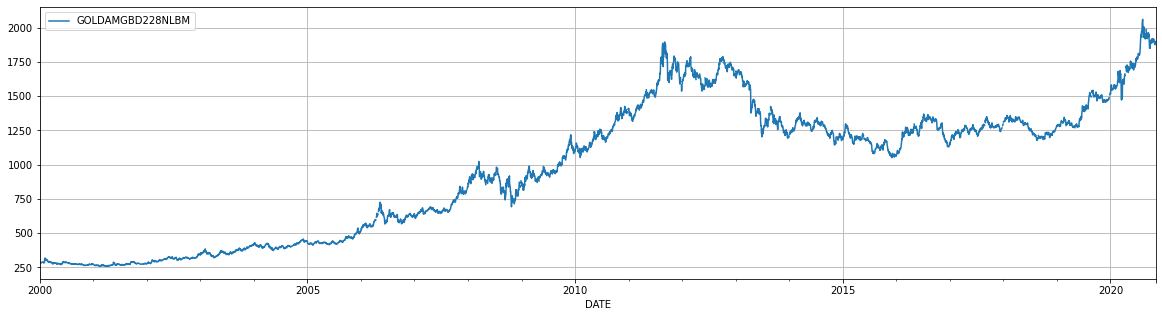

In [ ]:

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 


df_gold = pdr.DataReader('GOLDAMGBD228NLBM', 'fred', start='2000-01-01')
#kospi = stock.get_index_ohlcv_by_date("20190103", "20200715", "코스피")
#df_gold.fillna(method='ffill') #fill gaps forward, fill current na with past data

print('row count:', len(df_gold))
df_gold.tail(10)
df_gold.plot(figsize=(20,5))


TIME SERIES DECOMPOSITION #1 - trend component


In [ ]:
import numpy as np

df_gold['trend'] = np.nan        

# for i in range(5, df_gold['GOLDAMGBD228NLBM'].size-5):
#     df_gold['trend'][i] = df_gold['GOLDAMGBD228NLBM'][i-5] * 1.0 /20 + (
#         df_gold['GOLDAMGBD228NLBM'][i-4] +
#         df_gold['GOLDAMGBD228NLBM'][i-3] +
#         df_gold['GOLDAMGBD228NLBM'][i-2] +
#         df_gold['GOLDAMGBD228NLBM'][i-1] +
#         df_gold['GOLDAMGBD228NLBM'][i] +
#         df_gold['GOLDAMGBD228NLBM'][i+1] +
#         df_gold['GOLDAMGBD228NLBM'][i+2] +
#         df_gold['GOLDAMGBD228NLBM'][i+3] +
#         df_gold['GOLDAMGBD228NLBM'][i+4] 
#     ) *1.0 / 10 + df_gold['GOLDAMGBD228NLBM'][i+5]  *1.0 /20

step = 20
for i in range(step, df_gold['GOLDAMGBD228NLBM'].size-step):
    tmp = 0.0
    for j in range(-(step-1), step):
        tmp += df_gold['GOLDAMGBD228NLBM'][i+j] 
        
    df_gold['trend'][i] = df_gold['GOLDAMGBD228NLBM'][i-step] * 1.0 /(step*4) + tmp / (step*2) + df_gold['GOLDAMGBD228NLBM'][i+step]  *1.0 /(step*4)


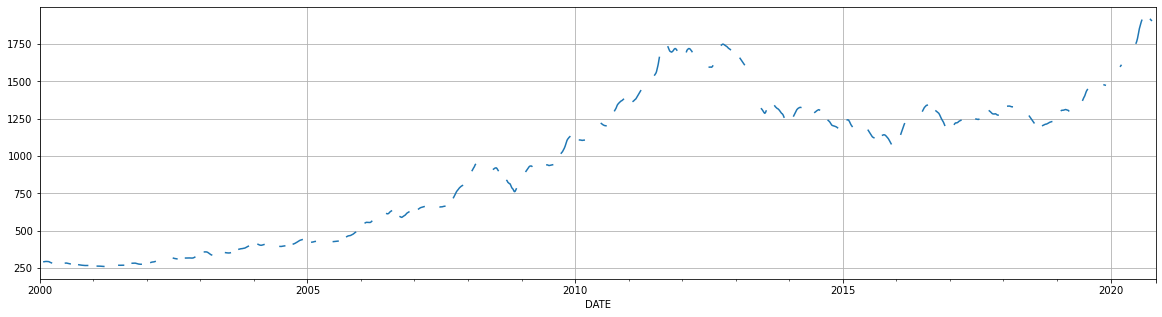

In [ ]:
 df_gold['trend'].plot(figsize=(20,5))
 #df_gold.plot(figsize=(20,5))

In [ ]:
df_gold_ip = df_gold.interpolate()
test = pd.DataFrame(df_gold_ip['GOLDAMGBD228NLBM'][0:100])
test_org = test.copy()
print(type(test), type(df_gold))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
import numpy as np

def makeTrend(target, trend, step):
    for i in range(step, target.size-step):
        tmp = 0.0
        for j in range(-(step-1), step):
            tmp += target[i+j] 
            
        trend[i] = target[i-step] * 1.0 /(step*4) + tmp / (step*2) + target[i+step]  *1.0 /(step*4)

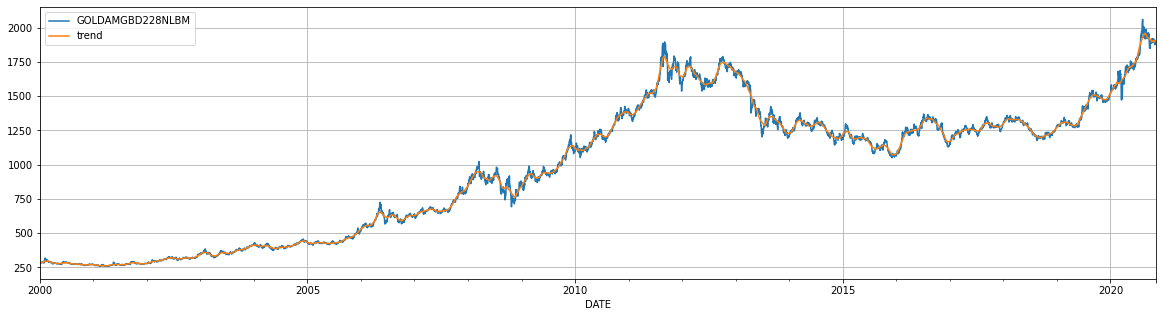

In [ ]:
makeTrend(df_gold_ip['GOLDAMGBD228NLBM'], df_gold_ip['trend'], 20)
#print( test_org[-20:], test['trend'][-20:])
#df_gold_ip['trend'].plot(figsize=(20,5))
df_gold_ip.plot(figsize=(20,5))

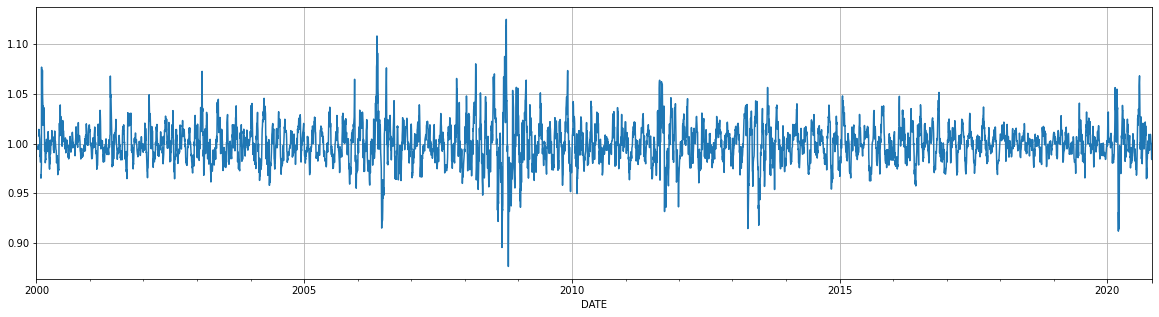

In [ ]:
#multiplicative, divide
df_gold_ip['Seasonality and Noise'] = df_gold_ip['GOLDAMGBD228NLBM']/df_gold_ip['trend']
#additive, subtract
df_gold_ip['Seasonality and Noise2'] = df_gold_ip['GOLDAMGBD228NLBM']-df_gold_ip['trend']
df_gold_ip['Seasonality and Noise'].plot(figsize=(20,5))


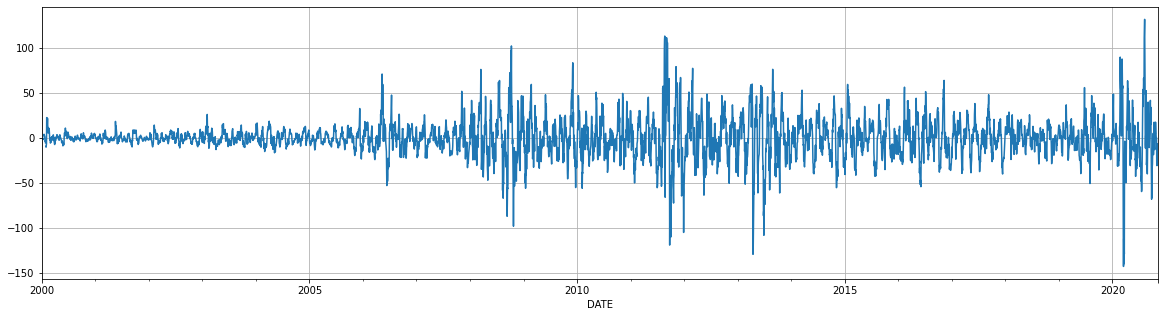

In [ ]:
df_gold_ip['Seasonality and Noise2'].plot(figsize=(20,5))

## 'pure' seasonal component

In [ ]:
import math 

df_gold_ip['MONTH'] = df_gold_ip.index.strftime('%m').astype(np.int)
#print(df_gold_ip['MONTH'])
average_seasonal_values = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
average_seasonal_value_counts = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}



for i in range(0, df_gold_ip['Seasonality and Noise'].size): 
    if math.isnan(df_gold_ip['Seasonality and Noise'][i]) is False:
        #average_seasonal_values[df_gold_ip['MONTH'][i]] += df_gold_ip['Seasonality and Noise'][i]
        average_seasonal_values[df_gold_ip['MONTH'][i]] =  average_seasonal_values[df_gold_ip['MONTH'][i]] + df_gold_ip['Seasonality and Noise'][i]
        #average_seasonal_value_counts[df_gold_ip['MONTH'][i]] += 1
        average_seasonal_value_counts[df_gold_ip['MONTH'][i]] = average_seasonal_value_counts[df_gold_ip['MONTH'][i]] + 1



for i in range(1,13):
    #average_seasonal_values[i] /= average_seasonal_value_counts[i]
    average_seasonal_values[i] = average_seasonal_values[i]  / average_seasonal_value_counts[i]
    #print(average_seasonal_values[df_gold_ip['MONTH'][30]])
    print(average_seasonal_values[i])
df_gold_ip['SEASONALITY'] = np.nan

print("--------------------------------")
count = 0
for i in range(0, df_gold_ip['Seasonality and Noise'].size):
    if math.isnan(df_gold_ip['Seasonality and Noise'][i]) is False:
        df_gold_ip['SEASONALITY'][i] = average_seasonal_values[df_gold_ip['MONTH'][i]]
        # if count < 10:
        #     print(df_gold_ip['SEASONALITY'][i])
        #     count += 1

df_tmp = df_gold_ip[['SEASONALITY','Seasonality and Noise']]
print(df_tmp)

1.000693535759311
1.0045525914457438
0.9985547247966551
0.9990750730334935
1.000805464237096
0.999399507750806
0.9988284308613748
0.9991748827499983
1.0019827371745078
0.9991690201492811
0.9996771652376651
0.9968210622424667
--------------------------------
1.000693535759311
1.000693535759311
1.000693535759311
1.000693535759311
1.000693535759311
1.000693535759311
1.000693535759311
1.000693535759311
1.000693535759311
1.000693535759311


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            SEASONALITY  Seasonality and Noise
DATE                                          
2000-01-03          NaN                    NaN
2000-01-04          NaN                    NaN
2000-01-05          NaN                    NaN
2000-01-06          NaN                    NaN
2000-01-07          NaN                    NaN
...                 ...                    ...
2020-10-29     0.999169               0.984434
2020-10-30     0.999169               0.983883
2020-11-02     0.999677               0.989627
2020-11-03     0.999677               0.996498
2020-11-04     0.999677               0.990571

[5438 rows x 2 columns]


DATE
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11    1.000694
2000-01-12    1.000694
2000-01-13    1.000694
2000-01-14    1.000694
2000-01-17         NaN
2000-01-18    1.000694
2000-01-19    1.000694
2000-01-20    1.000694
2000-01-21    1.000694
2000-01-24    1.000694
2000-01-25    1.000694
2000-01-26    1.000694
2000-01-27    1.000694
2000-01-28    1.000694
Name: SEASONALITY, dtype: float64


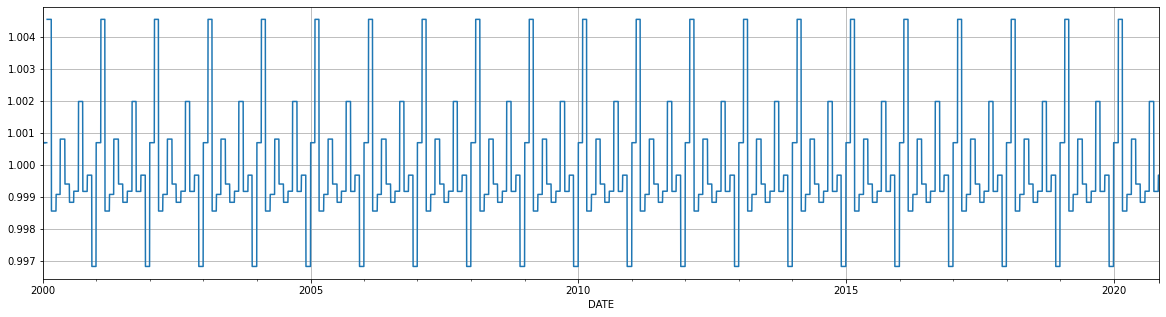

In [ ]:
print(df_gold_ip['SEASONALITY'][0:20])
df_gold_ip['SEASONALITY'].plot(figsize=(20,5))

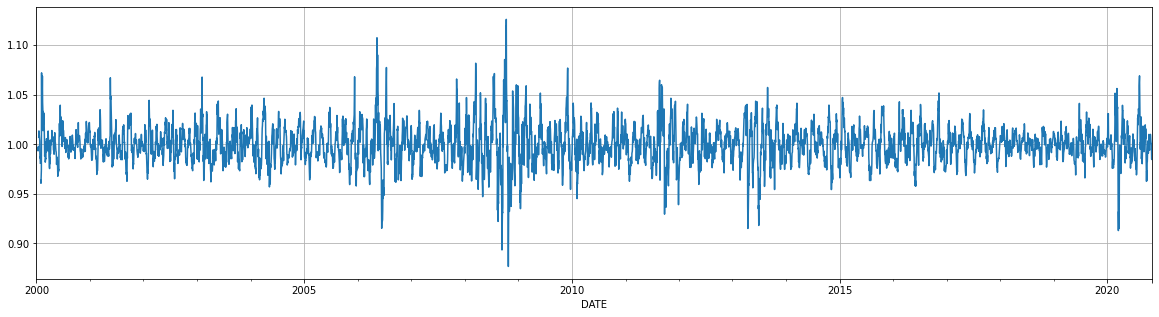

In [ ]:
df_gold_ip['NOISE'] = df_gold_ip['Seasonality and Noise'] / df_gold_ip['SEASONALITY']
df_gold_ip['NOISE'].plot(figsize=(20,5))

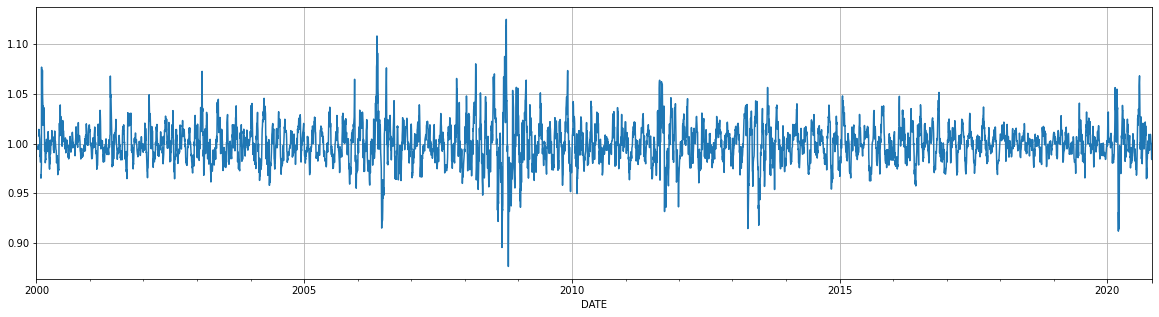

In [ ]:
df_gold_ip['Seasonality and Noise'].plot(figsize = (20,5))

In [ ]:
print(df_gold.columns)
print(df_gold.index)
print(df_gold.head())
print(df_gold.info())

print(df_gold['GOLDAMGBD228NLBM'].value_counts())  
print(df_gold.describe())  #  mean, max, median

Index(['GOLDAMGBD228NLBM'], dtype='object')
DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-26',
               '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30',
               '2020-11-02', '2020-11-03'],
              dtype='datetime64[ns]', name='DATE', length=5437, freq=None)
            GOLDAMGBD228NLBM
DATE                        
2000-01-03               NaN
2000-01-04            282.05
2000-01-05            282.10
2000-01-06            280.35
2000-01-07            282.00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5437 entries, 2000-01-03 to 2020-11-03
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GOLDAMGBD228NLBM  5265 non-null   float64
dtypes: float64(1)
memo

In [ ]:
def fitScale(base, target, head_num = 0):
    base_mean = base.head(head_num).mean()
    target_mean = target.head(head_num).mean()
    if head_num == 0:
        base_mean = base.mean()
        target_mean = target.mean()
        
    print("base_mean ", base_mean, " target_mean ", target_mean)
        
    ratio = base_mean[0] / target_mean[0]

    new_target = target *ratio
    return new_target


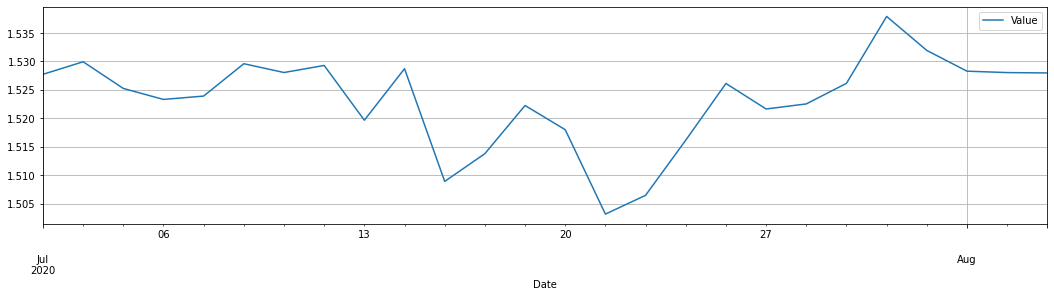

In [ ]:
#df_silver = quandl.get("FRED/GDP", start_date="2001-12-31", end_date="2005-12-31")
'''
AUD/USD: XUDLADD
CHF/USD: XUDLSFD
https://blog.quandl.com/api-for-currency-data

Source/Code
BOE(Bank of England)
'''
plt.rcParams["figure.figsize"] = (18,4)
plt.rcParams['axes.grid'] = True 

start_date= "2020-07-01"
aud_usd = quandl.get("BOE/XUDLADD", start_date=start_date )
chf_usd = quandl.get("BOE/XUDLSFD", start_date=start_date )
#aud_chf = chf_usd/aud_usd
aud_chf = aud_usd/chf_usd
aud_chf.plot()


In [ ]:
plt.rcParams["figure.figsize"] = (18,4)
plt.rcParams['axes.grid'] = True 
kospi = stock.get_index_ohlcv_by_date("20200701", "20200717", "코스피")
kospi_close = kospi["종가"]
kospi_close.plot()

NameError: ignored

한국 주식 정보 가져오기

In [ ]:
from pykrx import stock
#from pykrx import e3
#from pykrx import bond
#tickers = stock.get_market_ticker_list()
#print(tickers)

#시가총액
#df = stock.get_market_cap_by_date("20000101", "20200715", "005930", "d")

tickers = stock.get_index_ticker_list("20190103")
print(tickers)
kospi = stock.get_index_ohlcv_by_date("20190103", "20200727", "코스피")
print(kospi.head(2))

kospi_close = kospi["종가"]
#print(kospi_close)
kospi_close.plot()

In [ ]:
# AUD/CHF가 KOSPI에 하루 선행 하는지 확인해 보자

def fitScale2(base, target, head_num = 0):
    base_mean = base.head(head_num).mean()
    target_mean = target.head(head_num).mean()
    if head_num == 0:
        base_mean = base.mean()
        target_mean = target.mean()
        
    print("base_mean ", base_mean, " target_mean", target_mean)
        
    ratio = base_mean / target_mean

    new_target = target *ratio
    return new_target

start_date= "2019-01-02"
aud_usd = quandl.get("BOE/XUDLADD", start_date=start_date )
chf_usd = quandl.get("BOE/XUDLSFD", start_date=start_date )
aud_chf = chf_usd/aud_usd
#aud_chf = aud_usd/chf_usd
aud_chf.plot()

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 

print(aud_chf.columns)
print(type(aud_chf))
print(type(kospi_close))
print(aud_chf.head(2))
print(kospi_close.head(2))
#kospi_cur =  pd.concat([aud_chf, kospi_close], axis=1)
aud_chf_cor = fitScale2(kospi_close, aud_chf)
kospi_cur =  pd.concat([aud_chf_cor, kospi_close], axis=1)
kospi_cur_new = kospi_cur.dropna(axis=0)

kospi_cur.plot()
kospi_cur_new.plot()




In [ ]:
import numpy as np

kospi_cur_new.columns
kospi_cur_new.rename(columns= {'Value':'aud_chf'},inplace=True)

kospi_cur_new.rename(columns= {'종가':'kospi'},inplace=True)
ret = np.corrcoef(kospi_cur_new['aud_chf'], kospi_cur_new['kospi'])
print(ret)


In [ ]:
#df_silver = quandl.get("FRED/GDP", start_date="2001-12-31", end_date="2005-12-31")
df_silver = quandl.get("LBMA/SILVER", start_date="2000-01-01", )
#pdr.DataReader('LBMA/SILVER', 'quandl', start='2000-01-01')

print('row count:', len(df_silver))
df_silver.tail(10)
df_silver.plot()


In [ ]:
print(df_gold.columns)
print(df_silver.columns)
print(df_gold.index)

Index(['GOLDAMGBD228NLBM'], dtype='object')


NameError: ignored

In [ ]:
df_silver = df_silver.drop(['GBP', 'EURO'], axis=1)
df_silver = df_silver.rename(columns={'USD':'Silver/USD'})

In [ ]:
raw_m = pd.merge(df_gold, df_silver, how='inner', left_index=True, right_index=True)

silver를 gold 가격의 평균에 맞춰 scale 

base_mean  GOLDAMGBD228NLBM    954.883244
dtype: float64  target_mean  Silver/USD    14.975895
dtype: float64


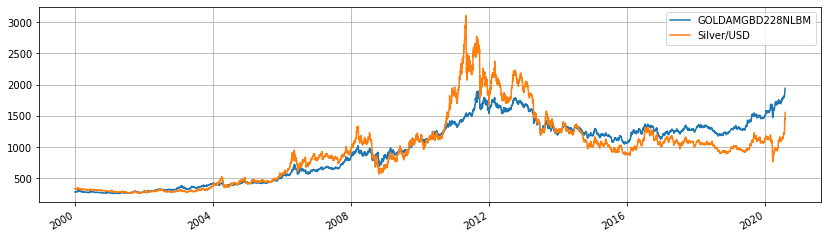

In [ ]:
df_silver_m = fitScale(df_gold, df_silver)
raw_m = pd.merge(df_gold, df_silver_m, how='inner', left_index=True, right_index=True)
raw_m.plot()

row count: 232


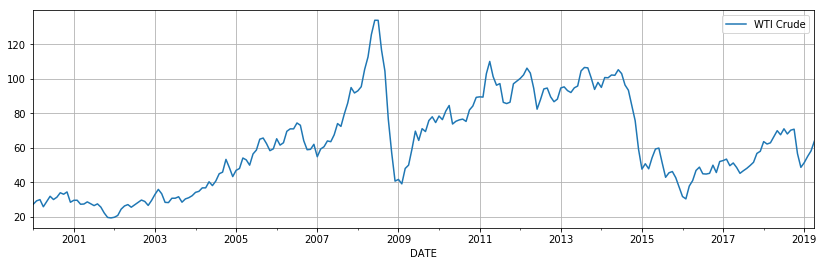

In [ ]:
import pandas as pd
import pandas_datareader as pdr

# 서부 텍사스 중질유(WTI Crude), monthly
df_wt = pdr.DataReader('POILWTIUSDM', 'fred', start='2000-01-01')
df_wt = df_wt.rename(columns={'POILWTIUSDM':'WTI Crude'})

print('row count:', len(df_wt))
df_wt.tail(10)
df_wt.plot()

base_mean  GOLDAMGBD228NLBM    921.744672
dtype: float64  target_mean  WTI Crude    61.934141
dtype: float64


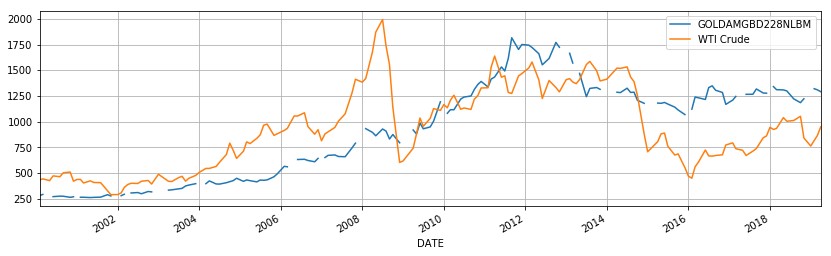

In [ ]:
gold_mean = df_gold.mean()
wt_mean = df_wt.mean()
ratio = gold_mean[0] / wt_mean[0]

df_wt_m = fitScale(df_gold, df_wt)

raw_m2 = pd.merge(df_gold, df_wt_m, how='inner', left_index=True, right_index=True)
raw_m2.plot()


In [ ]:
print(raw_m2.columns)

Index(['GOLDAMGBD228NLBM', 'WTI Crude'], dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


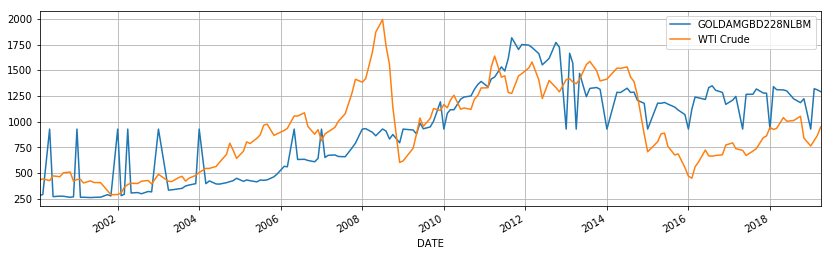

In [ ]:
from sklearn import preprocessing
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)

raw_m2_correct = raw_m2.copy()
raw_m2_correct[['GOLDAMGBD228NLBM']] = imp.fit_transform(raw_m2_correct[['GOLDAMGBD228NLBM']])
#raw_m2_correct[['GOLDAMGBD228NLBM']] = raw_m2_correct[['GOLDAMGBD228NLBM']].fillna(raw_m2_correct[['GOLDAMGBD228NLBM']].mean())

raw_m2_correct.plot()

## interpolate

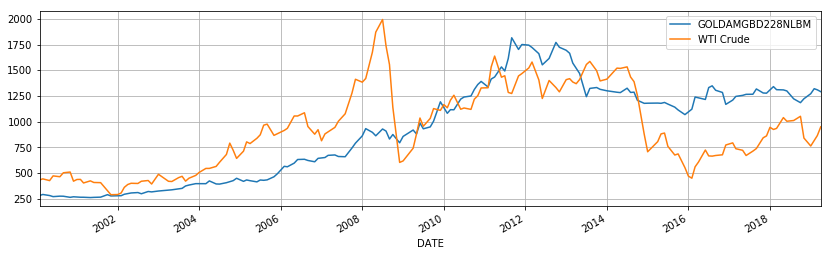

In [ ]:
raw_m2_correct = raw_m2.copy()
raw_m2_correct[['GOLDAMGBD228NLBM']] = raw_m2_correct[['GOLDAMGBD228NLBM']].interpolate()

raw_m2_correct.plot()

##Quandl에서 Gold data를 가져오기.

row count: 4937


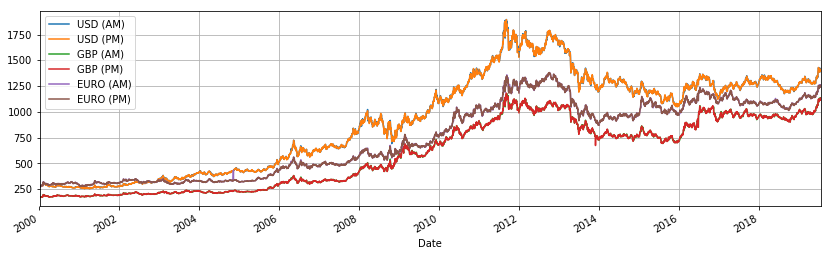

In [ ]:
qd_gold = quandl.get("LBMA/GOLD", start_date="2000-01-01", )
#pdr.DataReader('LBMA/SILVER', 'quandl', start='2000-01-01')

print('row count:', len(qd_gold))
qd_gold.tail(10)
qd_gold.plot()

            USD (AM)
Date                
2019-07-03   1425.10
2019-07-04   1415.25
2019-07-05   1414.40
2019-07-08   1404.90
2019-07-09   1387.90
2019-07-10   1395.45
2019-07-11   1423.10
2019-07-12   1405.60
2019-07-15   1416.25
2019-07-16   1416.10
(4937, 1) (5097, 1)


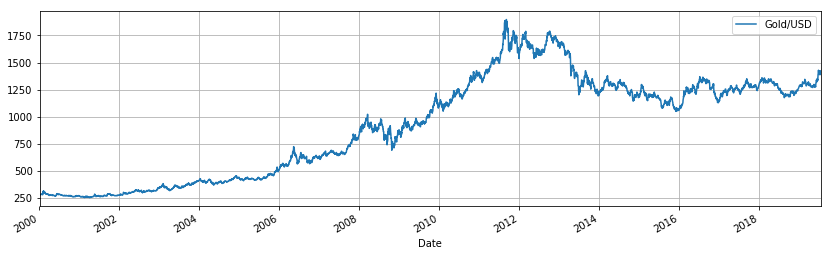

In [ ]:
qd_gold_usd = pd.DataFrame(qd_gold['USD (AM)'])
print(qd_gold_usd.tail(10))
qd_gold_usd = qd_gold_usd .rename(columns={'USD (AM)':'Gold/USD'})
qd_gold_usd.plot()

# 둘은 큰 차이 안난다.
print(qd_gold_usd.shape, df_gold.shape)

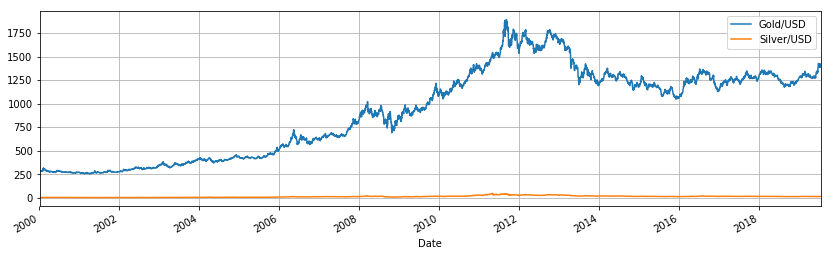

In [ ]:

mix1 = pd.merge(qd_gold_usd, df_silver, how='inner', left_index=True, right_index=True)
mix1.plot()


base_mean  Gold/USD    921.816143
dtype: float64  target_mean  Silver/USD    14.859268
dtype: float64


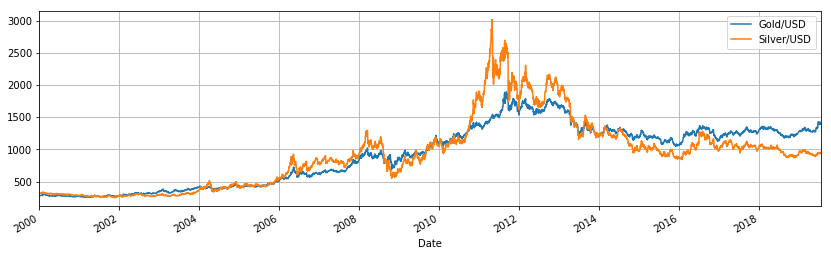

In [ ]:
new_silver = fitScale(qd_gold_usd, df_silver)
mix2 = pd.merge(qd_gold_usd, new_silver, how='inner', left_index=True, right_index=True)
mix2.plot()


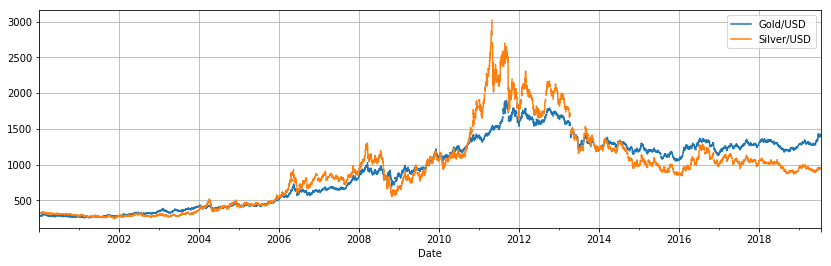

In [ ]:
qd_gold_usd_M = qd_gold_usd.resample('D').mean()
new_silver_M = new_silver.resample('D').mean()
mix3 = pd.merge(qd_gold_usd_M, new_silver_M, how='inner', left_index=True, right_index=True)
mix3.plot()

(5097, 1) (235, 1)
Index(['WTI Crude'], dtype='object')
base_mean  GOLDAMGBD228NLBM    922.901225
dtype: float64  target_mean  WTI Crude    61.934141
dtype: float64


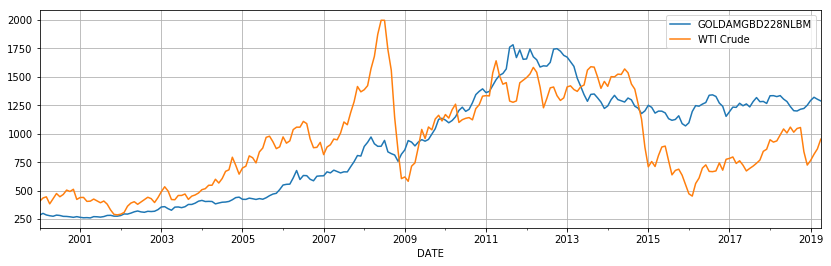

In [ ]:
#분 단위로 resample , T
#gold_M = df_gold.resample('T').mean()
#일 단위
gold_M = df_gold.resample('M').mean()


print(df_gold.shape, gold_M.shape)
#gold_M.plot()
print(df_wt.columns)


wt_M = df_wt.resample('M').mean()
#wt_M.plot()


wt_M = fitScale(gold_M, wt_M)


raw_m3 = pd.merge(gold_M, wt_M, how='inner', left_index=True, right_index=True)
raw_m3.plot()

In [ ]:
df_silver.tail(5)

,Silver/USD
Date,
2019-07-10,15.095
2019-07-11,15.265
2019-07-12,15.140
2019-07-15,15.320
2019-07-16,15.395


In [ ]:
from sklearn import preprocessing


scaler = preprocessing.MinMaxScaler()
df_silver_scale = df_silver.copy()
#df_silver_scale['scaled'] = scaler.fit_transform(df_silver_scale['USD'].values.reshape(-1,1))
df_silver_scale['scaled'] = scaler.fit_transform(df_silver_scale['Silver/USD'].values.reshape(-1,1))

#pd.DataFrame(scaler.fit_transform(df_silver['USD'].values), columns=df_silver.columns)
df_silver_scale.tail(5)


,Silver/USD,scaled
Date,,
2019-07-10,15.095,0.247115
2019-07-11,15.265,0.250924
2019-07-12,15.140,0.248124
2019-07-15,15.320,0.252156
2019-07-16,15.395,0.253837


base_mean  GOLDAMGBD228NLBM    921.744672
dtype: float64  target_mean  Silver/USD    14.859268
dtype: float64


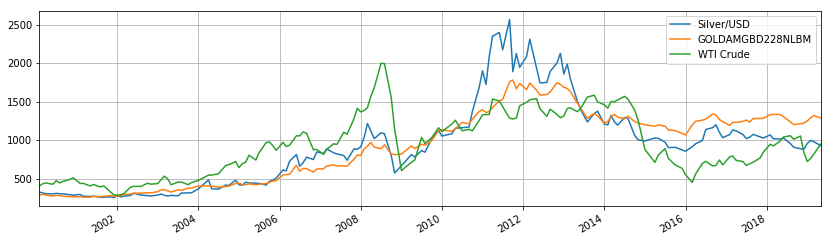

In [ ]:
silver_m = fitScale(df_gold, df_silver)
#raw_m_scale = pd.merge(df_gold, df_silver, how='inner', left_index=True, right_index=True)

raw_m4 = pd.merge(silver_m, raw_m3, how='inner', left_index=True, right_index=True)
raw_m4.plot()


##Example of AAPL


row count: 4585
              Open    High       Low  ...  Adj. Low  Adj. Close  Adj. Volume
Date                                  ...                                   
2018-03-14  180.32  180.52  177.8100  ...  177.8100     178.440   29075469.0
2018-03-15  178.50  180.24  178.0701  ...  178.0701     178.650   22584565.0
2018-03-16  178.65  179.12  177.6200  ...  177.6200     178.020   36836456.0
2018-03-19  177.32  177.47  173.6600  ...  173.6600     175.300   32804695.0
2018-03-20  175.24  176.80  174.9400  ...  174.9400     175.240   19314039.0
2018-03-21  175.04  175.09  171.2600  ...  171.2600     171.270   35247358.0
2018-03-22  170.00  172.68  168.6000  ...  168.6000     168.845   41051076.0
2018-03-23  168.39  169.92  164.9400  ...  164.9400     164.940   40248954.0
2018-03-26  168.07  173.10  166.4400  ...  166.4400     172.770   36272617.0
2018-03-27  173.68  175.15  166.9200  ...  166.9200     168.340   38962839.0

[10 rows x 12 columns]


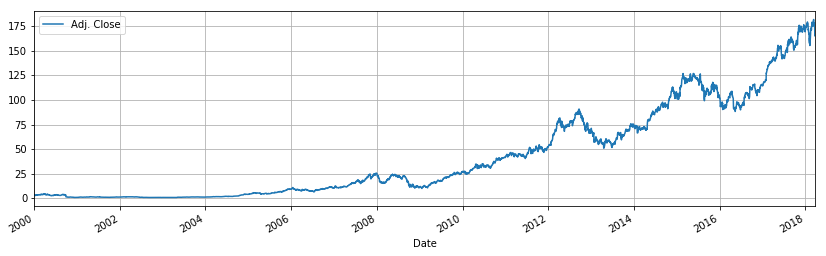

In [ ]:
df_aapl = quandl.get("WIKI/AAPL", start_date="2000-01-01", )
#pdr.DataReader('LBMA/SILVER', 'quandl', start='2000-01-01')

print('row count:', len(df_aapl))
print(df_aapl.tail(10))
#튜플을 사용해서 복수의 column읽어오기
#aapl_adj = df_aapl[['Adj. Close', 'Adj. Open']]


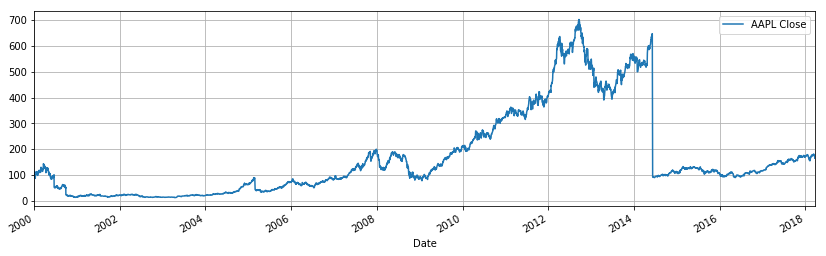

In [ ]:
aapl_close = pd.DataFrame(df_aapl['Close'])
aapl_close = aapl_close.rename(columns={'Close':'AAPL Close'})
aapl_close.plot()

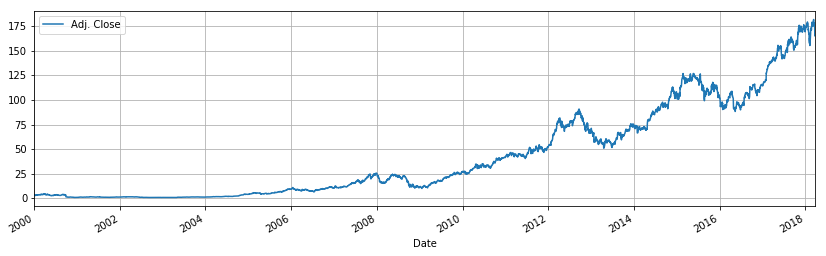

In [ ]:
aapl_adj = pd.DataFrame(df_aapl['Adj. Close'])
aapl_adj.plot()
aapl_adj = aapl_adj.rename(columns={'Adj. Close':'AAPL Adj'})

row count: 4664
            Index Value     High  ...  Total Market Value  Dividend Market Value
Trade Date                        ...                                           
2019-07-04      1833.81  1833.81  ...        2.222849e+11                    0.0
2019-07-05      1811.31  1811.31  ...        2.195314e+11             25661300.0
2019-07-08      1805.28  1805.28  ...        2.188008e+11                    0.0
2019-07-09      1796.93  1796.93  ...        2.177882e+11                    0.0
2019-07-10      1795.67  1795.67  ...        2.176363e+11                    0.0
2019-07-11      1786.18  1786.18  ...        2.164857e+11                    0.0
2019-07-12      1799.04  1799.04  ...        2.180441e+11                    0.0
2019-07-15      1816.34  1816.34  ...        2.201409e+11                    0.0
2019-07-16      1854.85  1854.85  ...        2.248090e+11                    0.0
2019-07-17          NaN     0.00  ...                 NaN                    0.0

[10 rows x 

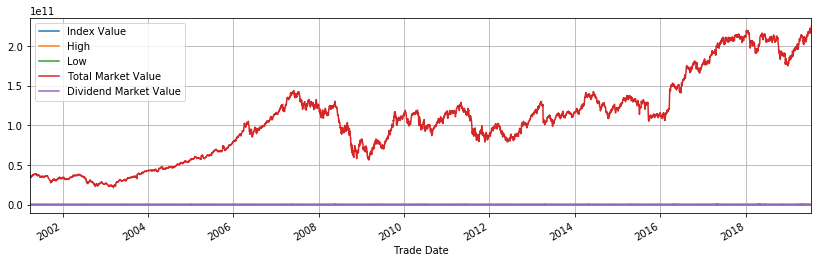

In [ ]:
df_temp = quandl.get("NASDAQOMX/NQDMEU2300LMGBPT", start_date="2000-01-01", )

print('row count:', len(df_temp))
print(df_temp.tail(10))
df_temp.plot()

print(df_temp.columns)


base_mean  GOLDAMGBD228NLBM    921.744672
dtype: float64  target_mean  Nasdaq Index    850.339854
dtype: float64
base_mean  GOLDAMGBD228NLBM    921.744672
dtype: float64  target_mean  Adj. Close    43.209200
Adj. Open     43.215866
dtype: float64


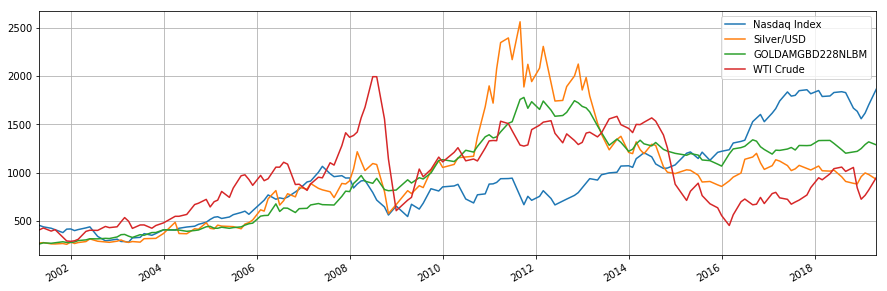

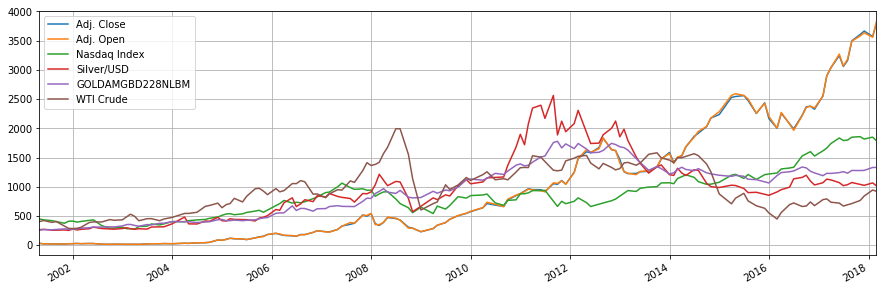

In [ ]:
# df_nasdaq가 df가 아니라서 에러 발생
#df_nasdaq = df_temp['Index Value']
df_nasdaq = pd.DataFrame(df_temp['Index Value'])
df_nasdaq = df_nasdaq.rename(columns={'Index Value':'Nasdaq Index'})

df_nasdaq_m = df_nasdaq.resample('T').mean()

df_nasdaq_m = fitScale(df_gold, df_nasdaq_m)

#raw_m_scale = pd.merge(df_gold, df_silver, how='inner', left_index=True, right_index=True)

raw_m5 =  pd.merge(df_nasdaq_m, raw_m4, how='inner', left_index=True, right_index=True)
raw_m5.plot(figsize=(15,5))





base_mean  GOLDAMGBD228NLBM    921.744672
dtype: float64  target_mean  AAPL Adj    43.2092
dtype: float64


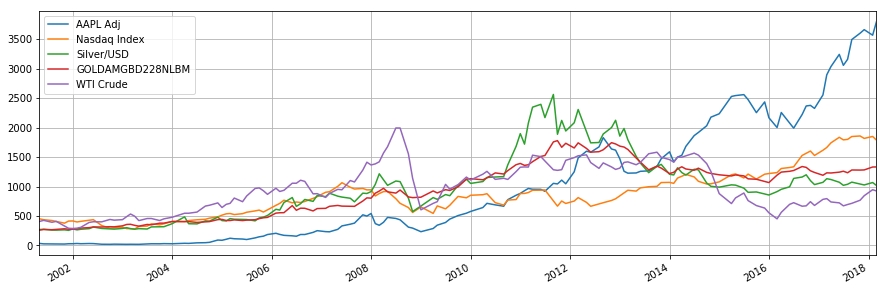

In [ ]:
aapl_adj_m = fitScale(df_gold, aapl_adj)
raw_m6 =  pd.merge(aapl_adj_m, raw_m5, how='inner', left_index=True, right_index=True)
raw_m6.plot(figsize=(15,5))
